# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы БФИ2001 Аржанова Анастасия
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

посторение пути из точки B в тчоку E:
B->A->E


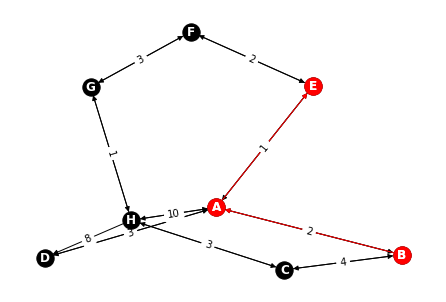

726 ms 416 ms


In [11]:
#Алгоритм Флойда-Уоршелла
import math
import time
import networkx as nx
import matplotlib.pyplot as plt

def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                k = i
                kk = ii
                while k>=len(alf):
                    k-=len(alf)
                while kk>=len(alf):
                    kk-=len(alf)                    
                path.append((alf[k].upper(),alf[kk].upper(),v[i][ii]))
    return path

def matric(rez,alf,path):#создание списка кортеджей длин наименьшего пути
    path_m = []
    for i in range(len(rez)-1):
        for ii in path:
            if ii[0] == alf[rez[i]-1].upper() and ii[1] == alf[rez[i+1]-1].upper():
                path_m.append((alf[rez[i]-1].upper(),alf[rez[i+1]-1].upper(),ii[2]))
    return path_m

def floyd_algorithm(V,n,start,end):# создание матрицы из всех возможных путей
    p = [[v for v in range(n)]for u in range(n)]# начальный список предыдущих вершин для поиска кратчайшего пути
    for k in range(n):
        for i in range(n):
            for j in range(n):
                d = V[i][k]+V[k][j]
                if V[i][j]>d:
                    V[i][j] = d
                    p[i][j] = k# номер промежуточной вершины при движении от i до j
    r = get_path(p,end-1,start-1)
    r.reverse()
    return r

def get_path(P,u,v):# алгорит нахождения наименьшего пути
    path = [u+1]
    while u!=v:
        u = P[u][v]
        path.append(u+1)
    return path



def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    

alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
V = []
z = []
for i in f:
    z.append(i)
f.close()
path = mat(z,alf)
for i in z:
    k = i.split()
    o = []
    for ii in k:
        if ii == "-":
            o.append(math.inf)
        else:
            o.append(int(ii))
    V.append(o)
    o = []

n = len(V)#число вершин в графе
s = "B"
e = "E"
start = alf.index(s.lower())+1# начальная вершина
end = alf.index(e.lower())+1#конечная вершина
start_time = time.time()
rez = floyd_algorithm(V,n,start,end)
time_matrix = "{0} ms".format(round((time.time() - start_time)*1000))
put = ""
print(f'посторение пути из точки {alf[start-1].upper()} в тчоку {alf[end-1].upper()}:')
for i in rez:
    put += alf[i-1].upper()+"->"
print(put[:-2])
rezMatrix = matric(rez,alf,path)
graf(path,rezMatrix)

f = open("mas_100.txt", "r",encoding='utf-8')
V = []
z = []
for i in f:
    z.append(i)
f.close()
path = mat(z,alf)
for i in z:
    k = i.split()
    o = []
    for ii in k:
        if ii == "-":
            o.append(math.inf)
        else:
            o.append(int(ii))
    V.append(o)
    o = []
n = len(V)
start_time = time.time()
rez = floyd_algorithm(V,n,start,end)
time_matrix_100 = "{0} ms".format(round((time.time() - start_time)*1000))

посторение пути из точки B в тчоку E:
B->A->E


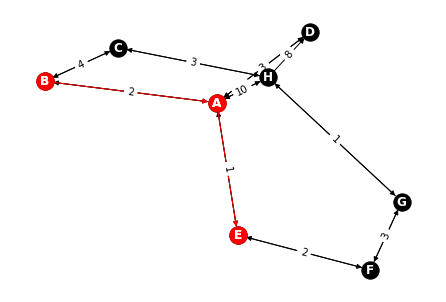

In [12]:
#Алгоритм Дейкстры
import math
import time
import networkx as nx
import matplotlib.pyplot as plt

def matric(rez,alf,path):#создание списка кортеджей длин наименьшего пути
    path_m = []
    for i in range(len(rez)-1):
        for ii in path:
            if ii[0] == alf[rez[i]].upper() and ii[1] == alf[rez[i+1]].upper():
                path_m.append((alf[rez[i]].upper(),alf[rez[i+1]].upper(),ii[2]))
    return path_m
def read_file(f,alf):
    V = []
    z = []
    for i in f:
        z.append(i)
    path = mat(z,alf)
    for i in z:
        k = i.split()
        o = []
        for ii in k:
            if ii == "-":
                o.append(math.inf)
            else:
                o.append(int(ii))
        V.append(o)
        o = []
    return V,path
def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                k = i
                kk = ii
                while k>=len(alf):
                    k-=len(alf)
                while kk>=len(alf):
                    kk-=len(alf)                    
                path.append((alf[k].upper(),alf[kk].upper(),v[i][ii]))
    return path

def arg_min(T, S):
    amin = -1
    m = math.inf  # максимальное значение
    for i, t in enumerate(T):
        if t < m and i not in S:
            m = t
            amin = i

    return amin
def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    
    
alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
D, path = read_file(f,alf)
f.close()
start_time = time.time()
N = len(D) # число вершин в графе
T = [math.inf]*N   # последняя строка таблицы

v = 1       # стартовая вершина (нумерация с нуля)
S = {v} # просмотренные вершины
T[v] = 0    # нулевой вес для стартовой вершины
M = [0]*N   # оптимальные связи между вершинами

while v != -1: # цикл, пока не просмотрим все вершины
    for j, dw in enumerate(D[v]): # перебираем все связанные вершины с вершиной v
        if j not in S: # если вершина еще не просмотрена
            w = T[v] + dw
            if w < T[j]:
                T[j] = w
                M[j] = v        # связываем вершину j с вершиной v

    v = arg_min(T, S) # выбираем следующий узел с наименьшим весом
    if v >= 0: # выбрана очередная вершина
        S.add(v) # добавляем новую вершину в рассмотрение

#print(T, M, sep="\n")

# формирование оптимального маршрута:
start = 1
end = 4
end_c = end
P = [end]
while end != start:
    end = M[P[-1]]
    P.append(end)
P.reverse()
put = ""
time_matrix_de = "{0} ms".format(round((time.time() - start_time)*1000))
print(f'посторение пути из точки {alf[start].upper()} в тчоку {alf[end_c].upper()}:')
for i in P:
    put += alf[i].upper()+"->"
print(put[:-2])
rez_m = matric(P,alf,path)
graf(path,rez_m)
f = open("mas_100.txt", "r",encoding='utf-8')
D, path = read_file(f,alf)
f.close()
start_time = time.time()
N = len(D) # число вершин в графе
T = [math.inf]*N   # последняя строка таблицы

v = 1       # стартовая вершина (нумерация с нуля)
S = {v} # просмотренные вершины
T[v] = 0    # нулевой вес для стартовой вершины
M = [0]*N   # оптимальные связи между вершинами

while v != -1: # цикл, пока не просмотрим все вершины
    for j, dw in enumerate(D[v]): # перебираем все связанные вершины с вершиной v
        if j not in S: # если вершина еще не просмотрена
            w = T[v] + dw
            if w < T[j]:
                T[j] = w
                M[j] = v        # связываем вершину j с вершиной v

    v = arg_min(T, S) # выбираем следующий узел с наименьшим весом
    if v >= 0: # выбрана очередная вершина
        S.add(v) # добавляем новую вершину в рассмотрение

#print(T, M, sep="\n")

# формирование оптимального маршрута:
start = 1
end = 4
end_c = end
P = [end]
while end != start:
    end = M[P[-1]]
    P.append(end)
P.reverse()
put = ""
time_matrix_de_100 = "{0} ms".format(round((time.time() - start_time)*1000))

посторение пути из точки A в тчоку H:
A->E->F->G->H


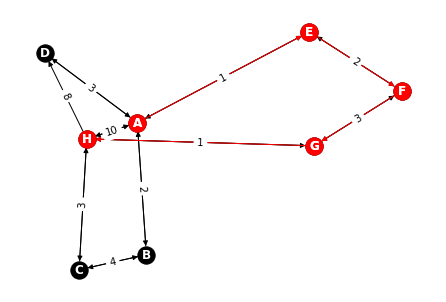

In [13]:
#Алгоритм Беллмана-Форда
import math
import time
import networkx as nx
import matplotlib.pyplot as plt

def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                k = i
                kk = ii
                while k>=len(alf):
                    k-=len(alf)
                while kk>=len(alf):
                    kk-=len(alf)                    
                path.append((alf[k].upper(),alf[kk].upper(),v[i][ii]))
    return path

def matric(rez,alf,path):#создание списка кортеджей длин наименьшего пути
    path_m = []
    for i in range(len(rez)-1):
        for ii in path:
            if ii[0] == alf[rez[i]].upper() and ii[1] == alf[rez[i+1]].upper():
                path_m.append((alf[rez[i]].upper(),alf[rez[i+1]].upper(),ii[2]))
    return path_m

def read_file(f,alf):
    V = []
    z = []
    for i in f:
        z.append(i)
    path = mat(z,alf)
    for i in z:
        k = i.split()
        o = []
        for ii in k:
            if ii == "-":
                o.append(math.inf)
            else:
                o.append(int(ii))
        V.append(o)
        o = []
    return V,path

def bellman_ford_path(matrix, start, end,n):
    edges = []
    for i in range(n):
        for j in range(n):
            if i != j and matrix[i][j] < math.inf:
                edges.append((i,j,matrix[i][j]))

    from_pos = 0
    to_pos = 1
    edge_length = 2
    d = [math.inf] * n
    d[start] = 0
    p = [-1] * n
    while True:
        flag = False
        for j in range(len(edges)):
            if d[edges[j][from_pos]] < math.inf:
                if d[edges[j][to_pos]] > d[edges[j][from_pos]] + edges[j][edge_length]: 
                    d[edges[j][to_pos]] = d[edges[j][from_pos]] + edges[j][edge_length]
                    p[edges[j][to_pos]] =  edges[j][from_pos]
                    flag = True
        if not flag:  
            break
    if d[end] == math.inf:
        return [], d
    else:
        path = []
        cur = end
        while cur != -1:
            path.append(cur)
            cur=p[cur]
        return path[::-1], d

def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    

alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()

n = len(V)#число вершин в графе
s = "A"
e = "H"
start = alf.index(s.lower())# начальная вершина
end = alf.index(e.lower())#конечная вершина
start_time = time.time()
path_m, d = bellman_ford_path(V, start, end,n)
time_matrix_Be = "{0} ms".format(round((time.time() - start_time)*1000))
put = ""
print(f'посторение пути из точки {alf[start].upper()} в тчоку {alf[end].upper()}:')
for i in path_m:
    put += alf[i].upper()+"->"
print(put[:-2])
rezMatrix = matric(path_m,alf,path)
graf(path,rezMatrix)
f = open("mas.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()

n = len(V)
start_time = time.time()
path_m, d = bellman_ford_path(V, start, end,n)
time_matrix_Be_100 = "{0} ms".format(round((time.time() - start_time)*1000))

посторение пути из точки A в тчоку H:
A->H


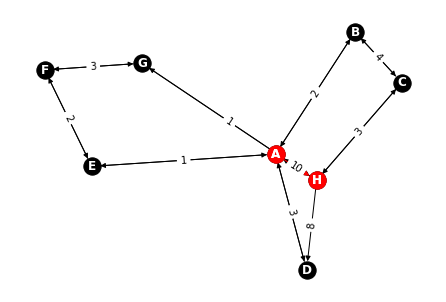

In [16]:
# Алгоритм Джонсона
import math
import copy
import networkx as nx
import matplotlib.pyplot as plt
def matric(rez,alf,path):#создание списка кортеджей длин наименьшего пути
    path_m = []
    for i in range(len(rez)-1):
        for ii in path:
            if ii[0] == alf[rez[i]].upper() and ii[1] == alf[rez[i+1]].upper():
                path_m.append((alf[rez[i]].upper(),alf[rez[i+1]].upper(),ii[2]))
    return path_m
def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    
def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                k = i
                kk = ii
                while k>=len(alf):
                    k-=len(alf)
                while kk>=len(alf):
                    kk-=len(alf)                    
                path.append((alf[k].upper(),alf[kk].upper(),v[i][ii]))
    return path

def read_file(f,alf):
    V = []
    z = []
    for i in f:
        z.append(i)
    path = mat(z,alf)
    for i in z:
        k = i.split()
        o = []
        for ii in k:
            if ii == "-":
                o.append(math.inf)
            else:
                o.append(int(ii))
        V.append(o)
        o = []
    return V,path

def d_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    return result[::-1]

def dijkstra_path(matrix, start, end):
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]
    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node
    if dist[end] == math.inf:
        return [], dist
    else:
        return d_get_path(prev, start, end), dist

def bellman_ford_path(matrix, start, end,n):
    edges = []
    for i in range(n):
        for j in range(n):
            if i != j and matrix[i][j] < math.inf:
                edges.append((i,j,matrix[i][j]))

    from_pos = 0
    to_pos = 1
    edge_length = 2
    d = [math.inf] * n
    d[start] = 0
    p = [-1] * n
    while True:
        flag = False
        for j in range(len(edges)):
            if d[edges[j][from_pos]] < math.inf:
                if d[edges[j][to_pos]] > d[edges[j][from_pos]] + edges[j][edge_length]: 
                    d[edges[j][to_pos]] = d[edges[j][from_pos]] + edges[j][edge_length]
                    p[edges[j][to_pos]] =  edges[j][from_pos]
                    flag = True
        if not flag:  
            break
    if d[end] == math.inf:
        return [], d
    else:
        path = []
        cur = end
        while cur != -1:
            path.append(cur)
            cur=p[cur]
        return path[::-1], d

def johnsons_path(matrix, start, end,n):
    bf_path, bf_dist = bellman_ford_path(copy.deepcopy(matrix), start, end,n) 
    if bf_dist == []: 
        return []
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                matrix[i][j] += bf_dist[i] - bf_dist[j]
    paths = []
    dist = []
    for i in range(n):
        p, d = dijkstra_path(matrix, i, end)
        paths.append(p)
        dist.append(d)
    for i in range(n):
        for j in range(n):
            if dist[i][j] != math.inf and bf_dist[i] != math.inf and bf_dist[j] != math.inf:
                dist[i][j] +=  bf_dist[j] - bf_dist[i]
    return paths[start]


alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()
n = len(V)#число вершин в графе
s = "A"
e = "H"
put=""
start = alf.index(s.lower())# начальная вершина
end = alf.index(e.lower())#конечная вершина
start_time = time.time()
rez= johnsons_path(V, start, end,n)
time_matrix_Jon = "{0} ms".format(round((time.time() - start_time)*1000))

print(f'посторение пути из точки {alf[start].upper()} в тчоку {alf[end].upper()}:')
for i in rez:
    put += alf[i].upper()+"->"
print(put[:-2])
rezMatrix = matric(rez,alf,path)
graf(path,rezMatrix)
f = open("mas_100.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()
n = len(V)#число вершин в графе
start_time = time.time()
rez= johnsons_path(V, start, end,n)
time_matrix_Jon_100 = "{0} ms".format(round((time.time() - start_time)*1000))

посторение пути из точки B в точоку E:
B->A->E


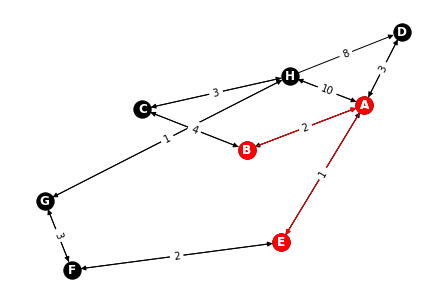

In [17]:
#Алгоритм Левита
import math
import copy
import networkx as nx
import matplotlib.pyplot as plt

def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                k = i
                kk = ii
                while k>=len(alf):
                    k-=len(alf)
                while kk>=len(alf):
                    kk-=len(alf)                    
                path.append((alf[k].upper(),alf[kk].upper(),v[i][ii]))
    return path

def matric(rez,alf,path):#создание списка кортеджей длин наименьшего пути
    path_m = []
    for i in range(len(rez)-1):
        for ii in path:
            if ii[0] == alf[rez[i]].upper() and ii[1] == alf[rez[i+1]].upper():
                path_m.append((alf[rez[i]].upper(),alf[rez[i+1]].upper(),ii[2]))
    return path_m
def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    
def read_file(f,alf):
    V = []
    z = []
    for i in f:
        z.append(i)
    path = mat(z,alf)
    for i in z:
        k = i.split()
        o = []
        for ii in k:
            if ii == "-":
                o.append(math.inf)
            else:
                o.append(int(ii))
        V.append(o)
        o = []
    return V,path

def levit_path(matrix, start, end):
    researched = []
    queues = {1 : [start], 2 : []}
    not_visited = [i for i in range(len(matrix))]
    not_visited.remove(start)
    dist = [math.inf] * len(matrix)
    dist[start] = 0
    path = [[start] for i in range(len(matrix))]
    while len(queues[1]) or len(queues[2]):
        if len(queues[2]) != 0:
            cur = queues[2].pop(0)
        else:
            cur = queues[1].pop(0)
        for ver in range(len(matrix)):
            if ver in not_visited:
                dist[ver] = dist[cur] + matrix[cur][ver]
                not_visited.remove(ver)
                queues[1].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
            elif ver in queues[1] or ver in queues[2]:
                if matrix[cur][ver] != math.inf and dist[ver] > dist[cur] + matrix[cur][ver]:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
                dist[ver] = min(dist[ver], dist[cur] + matrix[cur][ver])
            elif ver in researched and dist[ver] > dist[cur] + matrix[cur][ver]:
                dist[ver] = dist[cur] + matrix[cur][ver]
                researched.remove(ver)
                queues[2].append(ver)
                if matrix[cur][ver] != math.inf:
                    path[ver] = copy.deepcopy(path[cur])
                    path[ver].append(ver)
        researched.append(cur)
    result = path[end]
    return result


alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()

n = len(V)#число вершин в графе
s = "B"
e = "E"
start = alf.index(s.lower())# начальная вершина
end = alf.index(e.lower())#конечная вершина
start_time = time.time()
path_m = levit_path(V, start, end)
time_matrix_levi = "{0} ms".format(round((time.time() - start_time)*1000))


put = ""
print(f'посторение пути из точки {alf[start].upper()} в точоку {alf[end].upper()}:')
for i in path_m:
    put += alf[i].upper()+"->"
print(put[:-2])
rezMatrix = matric(path_m,alf,path)
graf(path,rezMatrix)

f = open("mas_100.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()

n = len(V)#число вершин в графе

start_time = time.time()
path_m = levit_path(V, start, end)
time_matrix_levi_100 = "{0} ms".format(round((time.time() - start_time)*1000))

посторение пути из точки A в тчоку H:
наименьший путь длиной: 7
A->E->F->G->H


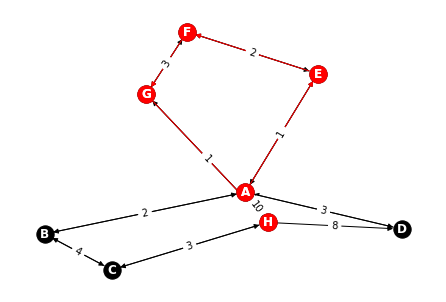

A->H


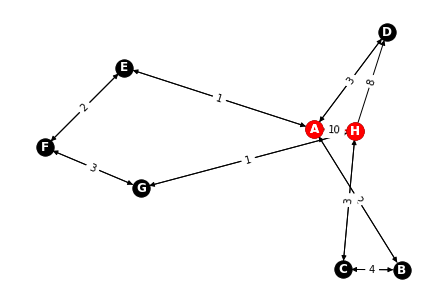

A->B->C->H


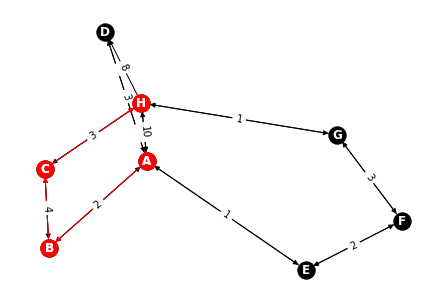

In [14]:
import math
import copy
import networkx as nx
import matplotlib.pyplot as plt

def graf(path,rezMatrix):# отрисовка графа
    G = nx.DiGraph() 
    M = nx.DiGraph()
    E = path
    Er=rezMatrix
    G.add_weighted_edges_from(E)
    M.add_weighted_edges_from(Er)
    pos=nx.spring_layout(G)
    
    nx.draw(G, pos, with_labels=True, font_weight='bold',font_color='white',node_color='black')
    nx.draw(M, pos, with_labels=True, font_weight='bold',font_color='white',node_color='red',edge_color='red')
    
    edge_weight = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels = edge_weight)
    plt.show()    
def mat(z,alf):#создание списка кортеджей которая всебе хранит растоянния от вершин
    v = []
    for k in z:
        v.append(k.split())
    n = len(v)
    path = []
    for i in range(n):
        for ii in range(n):
            if v[i][ii] =="0" or v[i][ii] == '-':
                pass
            else:
                k = i
                kk = ii
                while k>=len(alf):
                    k-=len(alf)
                while kk>=len(alf):
                    kk-=len(alf)                    
                path.append((alf[k].upper(),alf[kk].upper(),v[i][ii]))
    return path

def read_file(f,alf):
    V = []
    z = []
    for i in f:
        z.append(i)
    path = mat(z,alf)
    for i in z:
        k = i.split()
        o = []
        for ii in k:
            if ii == "-":
                o.append(math.inf)
            else:
                o.append(int(ii))
        V.append(o)
        o = []
    return V,path

def md_get_path(path, start, end):
    result = [end]
    while end != start:
        end = path[end]
        result.append(end)
    return result[::-1]

def mod_dijkstra(matrix, start):
    dist = [matrix[start][i] for i in range(len(matrix))]
    prev = [start for i in range(len(matrix))]

    checked_nodes = set()
    checked_nodes.add(start)
    for i in range(len(matrix)):
        node = 0
        for i in range(len(matrix)):
            if dist[i] < math.inf and i not in checked_nodes:
                node = i
        if node:
            checked_nodes.add(node)
            for i in range(len(matrix)):
                if dist[i] > matrix[node][i] + dist[node]:
                    dist[i] = matrix[node][i] + dist[node]
                    prev[i] = node

    paths = []
    for i in range(len(matrix)):
        paths.append(md_get_path(prev, start, i))
    return dist, paths

def yen_path(matrix, start, end, k_max = 1):
    candidates = set()
    d, p = mod_dijkstra(matrix, start)
    paths = [p[end]]
    dists = [d[end]]

    for k in range(1, k_max):
        cur_matrix = copy.deepcopy(matrix)
        for i in range(len(paths[-1]) - 1):
            node_spur = paths[-1][i]
            path_root = paths[-1][:i + 1]

            for line in paths:
                if path_root == line[:i + 1] and i + 1 < len(line):
                    cur_matrix[line[i]][line[i + 1]] = math.inf        

            for node in path_root:
                if node != node_spur:
                    cur_matrix[node] = [math.inf] * len(matrix)

            d, p = mod_dijkstra(cur_matrix, node_spur)

            spur_path = p[end][1:]
            if len(spur_path) != 0:
                f_path = path_root
                for t_node in spur_path:
                    f_path.append(t_node)
                f_path = tuple(f_path)
                f_dist = 0
                for j in range(1, len(f_path)):
                    f_dist += matrix[f_path[j - 1]][f_path[j]]
                candidates.add((f_path, f_dist))

            if not len(candidates):
                break

            temp_candidates = list(candidates)
            paths.append(list(temp_candidates[0][0]))
            dists.append(temp_candidates[0][1])
            candidates.remove(temp_candidates[0])

    result = []
    for i in range(len(paths)):
        for j in range(len(paths[i])):
            paths[i][j] += 1
        if len(result) < k_max:
            result.append(paths[i])
        else:
            return result


def min_dl(mas,path,alf):
    path_m = []
    o = []
    ch = 0
    ma = math.inf
    ind = 0
    for i in mas:
        for j in range(len(i)-1):
            for ii in path:
                if ii[0] == alf[i[j]-1].upper() and ii[1] == alf[i[j+1]-1].upper():
                    path_m.append((alf[i[j]-1].upper(),alf[i[j+1]-1].upper(),ii[2]))
                    ch+=int(ii[2])
        o.append(path_m)
        path_m=[]
        if ch<ma:
            ma = ch
            ch = 0
            ind = i
    return o,ma,ind

alf = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
f = open("mas.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()
        
n = len(V)#число вершин в графе
s = "A"
e = "H"
start = alf.index(s.lower())# начальная вершина
end = alf.index(e.lower())#конечная вершина
K = 3
start_time = time.time()
path_m = yen_path(V, start, end, K)
time_matrix_In = "{0} ms".format(round((time.time() - start_time)*1000))

rez,mi,ind = min_dl(path_m,path,alf)
print(f'посторение пути из точки {alf[start].upper()} в тчоку {alf[end].upper()}:')
print('наименьший путь длиной:',mi)
put=""
for ii in ind:
    put += alf[ii-1].upper()+"->"
print(put[:-2])
graf(path,rez[path_m.index(ind)])
put=""
for i in path_m:
    if i == ind:
        pass
    else:
        for ii in i:
            put += alf[ii-1].upper()+"->"
        print(put[:-2])   
        put=""
        graf(path,rez[path_m.index(i)])        
        
f = open("mas_100.txt", "r",encoding='utf-8')
V, path = read_file(f,alf)
f.close()
        
n = len(V)#число вершин в графе

start_time = time.time()
path_m = yen_path(V, start, end, K)
time_matrix_In_100 = "{0} ms".format(round((time.time() - start_time)*1000))

In [19]:
import pandas as pd
table_time =[[8,time_matrix,time_matrix_de,time_matrix_Be,time_matrix_Jon,time_matrix_levi,time_matrix_In_100],
             [100,time_matrix_100,time_matrix_de_100,time_matrix_Be_100,time_matrix_Jon_100,time_matrix_levi_100,time_matrix_In_100]]
pd.DataFrame(table_time, columns=["Количество узлов","Алгоритм Флойда-Уоршелла","Алгоритм Дейкстры","Алгоритм Беллмана-Форда","Алгоритм Джонсона","Алгоритм Левита","Алгоритм Йена"])
               

,Количество узлов,Алгоритм Флойда-Уоршелла,Алгоритм Дейкстры,Алгоритм Беллмана-Форда,Алгоритм Джонсона,Алгоритм Левита,Алгоритм Йена
0,8,726 ms,0 ms,0 ms,0 ms,1 ms,25 ms
1,100,416 ms,6 ms,0 ms,328 ms,19 ms,25 ms


### Вывод